<a href="https://colab.research.google.com/github/Whizzion957/ML_CST104/blob/main/Data_Analysis_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Import the necessary libraries and load the titanic dataset from the seaborn library into a pandas DataFrame

In [1]:
import pandas as pds
import seaborn as sns
import matplotlib.pyplot as plt
t_data=sns.load_dataset('titanic')

2. Display the first 5 rows of the dataset

In [2]:
dt = t_data.iloc[:5]
col_widths=[max(dt[col].astype(str).map(len).max(),len(col)) for col in dt.columns]
header="".join(f"{col:<{col_widths[i] + 2}}" for i, col in enumerate(dt.columns))
print(header)

for i in range(len(dt)):
    row = "".join(f"{str(dt.iloc[i, j]):<{col_widths[j] + 2}}" for j in range(len(dt.columns)))
    print(row)



survived  pclass  sex     age   sibsp  parch  fare     embarked  class  who    adult_male  deck  embark_town  alive  alone  
0         3       male    22.0  1      0      7.25     S         Third  man    True        nan   Southampton  no     False  
1         1       female  38.0  1      0      71.2833  C         First  woman  False       C     Cherbourg    yes    False  
1         3       female  26.0  0      0      7.925    S         Third  woman  False       nan   Southampton  yes    True   
1         1       female  35.0  1      0      53.1     S         First  woman  False       C     Southampton  yes    False  
0         3       male    35.0  0      0      8.05     S         Third  man    True        nan   Southampton  no     True   


3. Print the column headers to dataset



In [3]:
header="".join(f"{col} " for col in t_data.columns)
print(header)

survived pclass sex age sibsp parch fare embarked class who adult_male deck embark_town alive alone 


4. Change the column headers to uppercase

In [4]:
t_data.columns=t_data.columns.str.upper()
header="".join(f"{col} " for col in t_data.columns)
print(header)

SURVIVED PCLASS SEX AGE SIBSP PARCH FARE EMBARKED CLASS WHO ADULT_MALE DECK EMBARK_TOWN ALIVE ALONE 


5. Calculate and display the descriptive statistics of the dataset

In [5]:
def calc_mean(data):
    return sum(data)/len(data)

def calc_std(data):
    mean=calc_mean(data)
    var=sum((x-mean)**2 for x in data)/(len(data)-1)
    return var**0.5

def calc_quartiles(data):
    data_sort=sorted(data)
    n=len(data_sort)
    if(n%4!=0):
        Q1=data_sort[n//4]
        Q3=data_sort[3*n//4]
    else:
        Q1=(data_sort[n//4-1]+data_sort[n//4])/2
        Q3=(data_sort[3*n//4-1]+data_sort[3*n//4])/2

    if(n%2!=0):
        Q2=data_sort[n//2]
    else:
        Q2=(data_sort[n//2-1]+data_sort[n//2])/2

    return Q1,Q2,Q3

def calc_min_max(data):
    return min(data),max(data)

def calc_uniq_val(data):
    return len(set(data))

num_col = ['AGE', 'FARE']

for c in num_col:
    data = t_data[c].dropna()
    mean = calc_mean(data)
    std_dev = calc_std(data)
    Q1, Q2, Q3 = calc_quartiles(data)
    min_val, max_val = calc_min_max(data)
    uniq_val = calc_uniq_val(data)
    print(f"Statistics for column '{c}':")
    print(f"  Mean: {mean}")
    print(f"  Standard Deviation: {std_dev}")
    print(f"  25th Quartile: {Q1}")
    print(f"  50th Quartile (Median): {Q2}")
    print(f"  75th Quartile: {Q3}")
    print(f"  Minimum: {min_val}")
    print(f"  Maximum: {max_val}")
    print(f"  Number of Unique Values: {uniq_val}")
    print()

Statistics for column 'AGE':
  Mean: 29.69911764705882
  Standard Deviation: 14.526497332334044
  25th Quartile: 20.0
  50th Quartile (Median): 28.0
  75th Quartile: 38.0
  Minimum: 0.42
  Maximum: 80.0
  Number of Unique Values: 88

Statistics for column 'FARE':
  Mean: 32.2042079685746
  Standard Deviation: 49.693428597180905
  25th Quartile: 7.8958
  50th Quartile (Median): 14.4542
  75th Quartile: 31.0
  Minimum: 0.0
  Maximum: 512.3292
  Number of Unique Values: 248



6. Check for missing values in the dataset and print the total number of missing values for each column

In [6]:
for c in t_data.columns:
    cnt=0
    data=t_data[c]
    for i in data:
        if pds.isna(i):
            cnt+=1
    print(f"The number of empty cells in {c} is {cnt}")

The number of empty cells in SURVIVED is 0
The number of empty cells in PCLASS is 0
The number of empty cells in SEX is 0
The number of empty cells in AGE is 177
The number of empty cells in SIBSP is 0
The number of empty cells in PARCH is 0
The number of empty cells in FARE is 0
The number of empty cells in EMBARKED is 2
The number of empty cells in CLASS is 0
The number of empty cells in WHO is 0
The number of empty cells in ADULT_MALE is 0
The number of empty cells in DECK is 688
The number of empty cells in EMBARK_TOWN is 2
The number of empty cells in ALIVE is 0
The number of empty cells in ALONE is 0


7. Fill the missing values in the AGE column with the median age.

In [7]:
data=t_data['AGE']
data1=t_data['AGE'].dropna()
Q1,Q2,Q3=calc_quartiles(data1)
t_data['AGE']=t_data['AGE'].fillna(Q2)
print(t_data['AGE'])

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: AGE, Length: 891, dtype: float64


8. Find the average age of the passengers

In [8]:
data=t_data['AGE']
mean=calc_mean(data)
print(f"The average age of the passengers was {mean}")

The average age of the passengers was 29.36158249158249


9. Find the number of passengers who survived and those who did not

In [9]:
data=t_data['SURVIVED']
s=0
d=0
for i in data:
  if i == 0:
    d+=1
  else:
    s+=1
print(f"The number of passengers who survived are {s}")
print(f"The number of passengers who died are {d}")

The number of passengers who survived are 342
The number of passengers who died are 549


10. Calculate the survival rate(percentage of passengers who survived)

In [10]:
print(f"The survival rate was {s/(s+d)*100}%")

The survival rate was 38.38383838383838%


11. Plot a histogram of the ages of the passengers

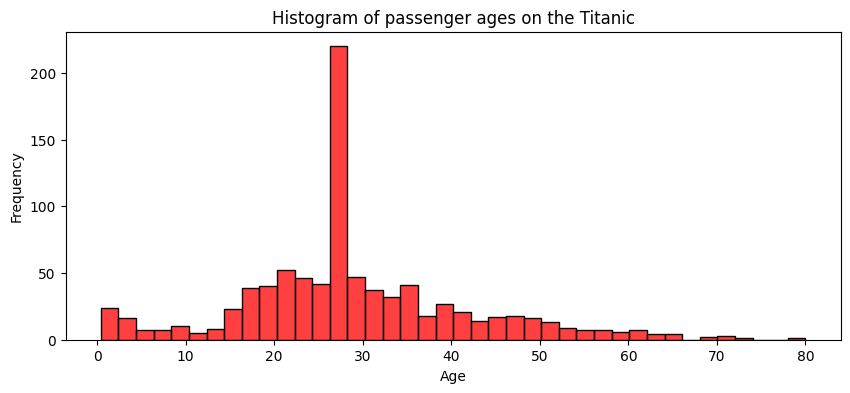

In [11]:
plt.figure(figsize=(10,4))
sns.histplot(t_data['AGE'], kde=False, bins=40, color='red')
plt.title('Histogram of passenger ages on the Titanic')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

12. Create a bar plot showing the number of passengers in each class

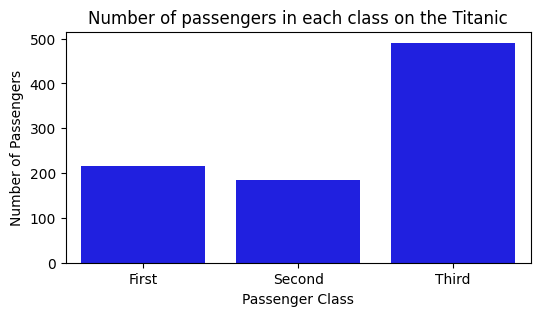

In [12]:
passenger_counts = t_data['CLASS'].value_counts().reset_index()
passenger_counts.columns = ['CLASS', 'COUNT']
x_val=passenger_counts['CLASS'].tolist()
y_val=passenger_counts['COUNT'].tolist()
plt.figure(figsize=(6, 3))
custom_order = ['First', 'Second', 'Third']
sns.barplot(x=x_val,y=y_val, color='blue', order=custom_order)
plt.title('Number of passengers in each class on the Titanic')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.show()

13. Create a count plot showing the number of survivors

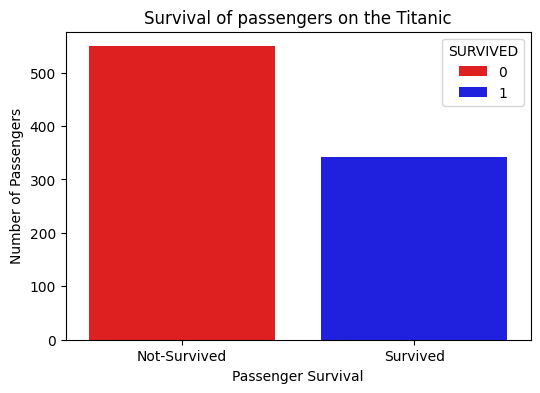

In [13]:
plt.figure(figsize=(6, 4))
sns.countplot(x='SURVIVED', hue='SURVIVED', data=t_data, palette=['red','blue'], order=[0,1])
plt.title('Survival of passengers on the Titanic')
plt.xlabel('Passenger Survival')
plt.ylabel('Number of Passengers')
plt.xticks([0,1], ['Not-Survived', 'Survived'])
plt.show()


END of ASSIGNMENT 02